In [1]:
from FHN_PDE_Simulator import FHN_PDE_Simulator as simulator

from SALib.sample import sobol as sampler
from SALib.analyze import sobol, morris
import numpy as np


STEPS = 100

In [2]:
problem = {
    'num_vars': 5,
    'names': ['Du','Dv','a','b','epsilon'],
    'bounds': [[0.5, 1.0],
               [0.0, 1.0],
               [0.05, 0.15],
               [0.2, 0.7],
               [0.001, 0.02]]
}

In [3]:
param_values = sampler.sample(problem, 32)

In [4]:
Y = []

for i, values in enumerate(param_values):
    params = dict(zip(problem['names'],values))
    sim = simulator(size=30,**params)
    sim.set_initial_conditions('spiral_obstacle')
    u = sim.run_simulation(STEPS)
    mean_u = np.mean(u)
    Y.append(mean_u)
    
Y = np.array(Y).reshape(-1,)

Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0065 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0055 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0056 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0053 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0053 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0053 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0053 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0053 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0054 s
U

{'S1': array([1.01507248e+00, 1.67865933e-02, 2.94847738e-02, 6.81399263e-05,
       9.92680567e-03]), 'S1_conf': array([0.41882144, 0.03522037, 0.06457249, 0.05832735, 0.07492158]), 'ST': array([1.04477473, 0.00553274, 0.02177017, 0.01057191, 0.01703968]), 'ST_conf': array([0.36851753, 0.00255196, 0.00923334, 0.00571692, 0.00903513]), 'S2': array([[        nan,  0.02907786, -0.00643387,  0.02456031,  0.03168963],
       [        nan,         nan, -0.01155563, -0.0134408 , -0.01084524],
       [        nan,         nan,         nan,  0.00086417, -0.00012353],
       [        nan,         nan,         nan,         nan, -0.00506821],
       [        nan,         nan,         nan,         nan,         nan]]), 'S2_conf': array([[       nan, 0.46967079, 0.48153177, 0.45896527, 0.47273389],
       [       nan,        nan, 0.06032798, 0.05662588, 0.05875431],
       [       nan,        nan,        nan, 0.10859848, 0.10553204],
       [       nan,        nan,        nan,        nan, 0.08241043

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

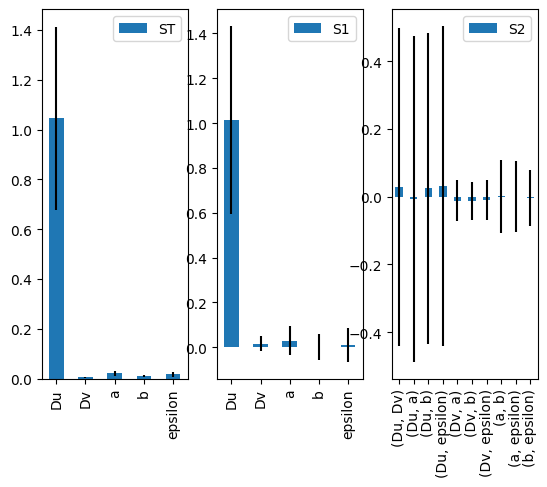

In [5]:
Si = sobol.analyze(problem, Y)
print(Si)

Si.plot()

{'names': array(['Du', 'Dv', 'a', 'b', 'epsilon'], dtype='<U7'), 'mu': masked_array(data=[-0.004063528342984768, -7.959434511121792e-05,
                   -0.0003455931065385106, 8.452316698341362e-05,
                   -0.00028444760332406536],
             mask=[False, False, False, False, False],
       fill_value=1e+20), 'mu_star': masked_array(data=[0.16662341457945629, 0.3301192123193839,
                   0.33006055329979417, 0.3301595158985172,
                   0.16518291054921222],
             mask=[False, False, False, False, False],
       fill_value=1e+20), 'sigma': array([0.23527738, 0.33274038, 0.33268165, 0.33278155, 0.23519824]), 'mu_star_conf': masked_array(data=[0.03601484345159473, 0.0005716634851084288,
                   0.0006903006713428804, 0.0007207587960613437,
                   0.035170223745285605],
             mask=[False, False, False, False, False],
       fill_value=1e+20)}


<Axes: >

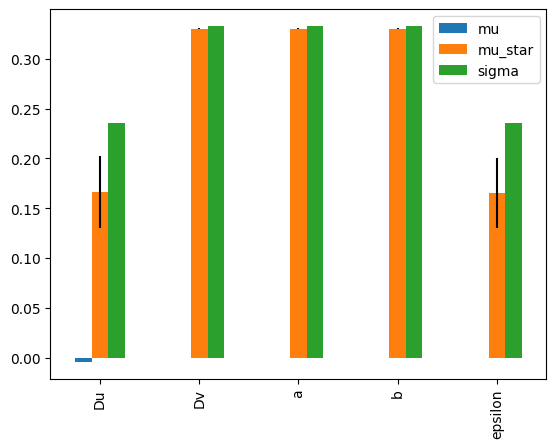

In [6]:
Mi = morris.analyze(problem,param_values,Y)
print(Mi)
Mi.plot()

# ODE


In [ ]:
def fhn_ode_surrogate(t, y, params):
    """
    Poprawiony 4-zmienny surogat ODE.
    y = [u, v, x, y]
    """
    u, v, x, y_rot = y
    a, b, epsilon, k1, k2, omega, gamma = params
    
    # Równania na podstawie skorygowanego PDF 
    du_dt = u * (1 - u) * (u - a) - v
    dv_dt = epsilon * (u - b * v)
    dx_dt = k1 * u - k2 * x          # Amplituda [cite: 15]
    dy_dt = omega * x - gamma * y_rot  # Rotacja [cite: 16]
    
    return [du_dt, dv_dt, dx_dt, dy_dt]

def ode_sim(t_span,t,y0,a,b,epsilon,k1,k2,omega,gamma):
    

problem = {
    'num_vars': 7,
    'names': ['a','b','epsilon','k1','k2','omega','gamma'],
    'bounds': [[0.05, 0.15],
               [0.2, 0.7],
               [0.001, 0.02],
               [0.2, 1],
               [0.2, 1],
               [0.01, 0.5],
               [0.01, 0.5]]
}

In [12]:
param_values = sampler.sample(problem, 16)

In [ ]:
ode_params = [
        pde_params['a'], pde_params['b'], pde_params['epsilon'],
        1,  # k1 [cite: 17]
        0.5,  # k2 [cite: 17]
        0.1,  # omega (częstość obrotu) [cite: 18]
        0.1   # gamma (tłumienie) [cite: 19]
    ]
    
    # Warunki początkowe dla ODE
    y0_ode = [np.mean(sim.u), np.mean(sim.v), 0, 0] # [u, v, x, y_rot]
    t_span_ode = (pde_time_vector[0], pde_time_vector[-1])
    
    print("Rozwiązywanie ODE...")
    sol_ode = solve_ivp(
        fhn_ode_surrogate,
        t_span_ode,
        y0_ode,
        args=(ode_params,),
        t_eval=pde_time_vector, # Ewaluuj w tych samych punktach czasu co PDE
        method='RK45'
    )

In [ ]:
from scipy.integrate import solve_ivp



In [8]:
y0_ode = [np.mean(sim.u), np.mean(sim.v), 0, 0] # [u, v, x, y_rot]
t = np.linspace(0, sim.dt*STEPS, STEPS)
t_span_ode = (t[0], t[-1])